In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

C:\Users\ADMIN\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
test = pd.read_csv("./test_data.csv")
train = pd.read_csv("./train_data.csv")

In [3]:
x_train = train.drop("label", axis=1).values
x_test = test.drop("label", axis=1).values

In [4]:
shape = x_train.shape[1]

In [5]:
x_train = x_train.reshape((-1, shape))
x_test = x_test.reshape((-1, shape))

In [6]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [7]:
y_train = train["label"].values
y_test = test["label"].values

In [8]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [9]:

# c. Define the network architecture using Keras
model = Sequential([
    Dense(shape, "relu"),
    Dense(64, "relu"),
    Dense(10, "softmax")
])

In [10]:
model.compile(optimizer="SGD", loss="categorical_crossentropy", metrics=["accuracy"])


In [11]:
M = model.fit(x_train, y_train, batch_size=128, epochs=10)


Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 47s 113ms/step - accuracy: 0.2591 - loss: 2.0605
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 47s 119ms/step - accuracy: 0.3689 - loss: 1.7895
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 47s 114ms/step - accuracy: 0.3958 - loss: 1.7182
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 40s 101ms/step - accuracy: 0.4201 - loss: 1.6619
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 40s 102ms/step - accuracy: 0.4323 - loss: 1.6232
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 40s 101ms/step - accuracy: 0.4524 - loss: 1.5700
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 43s 110ms/step - accuracy: 0.4603 - loss: 1.5477
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 82s 109ms/step - accuracy: 0.4703 - loss: 1.5161
Epoch 9/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 47s 120ms/step - accuracy: 0.4765 - loss: 1.5015
Epoch 10/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 45s 114ms/step - accuracy: 0.4825 - loss: 1.4779


In [12]:
# e. Evaluate the network
test_loss,test_acc=model.evaluate(x_test,y_test)
print('Test accuracy:',test_acc)
print('Test Loss:',test_loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.4407 - loss: 1.5903
Test accuracy: 0.4348999857902527
Test Loss: 1.594039797782898


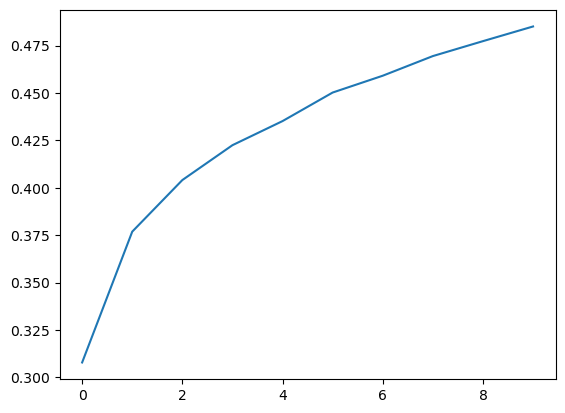

In [13]:
plt.plot(M.history["accuracy"])

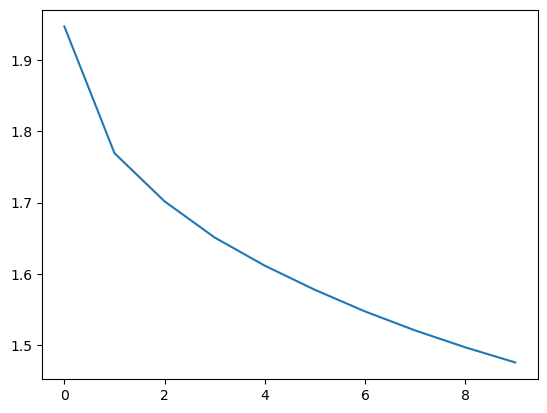

In [14]:
plt.plot(M.history["loss"])


In [15]:
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']


313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step
actual:  ship
predicted:  ship


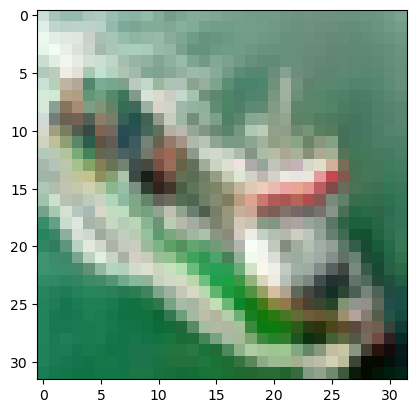

In [16]:
n = 15
plt.imshow(x_test[n].reshape((32,32,3)))

predictions = model.predict(x_test)

print("actual: ", classes[np.argmax(y_test[n])])
print("predicted: ", classes[np.argmax(predictions[n])])